In [1]:
import requests
import geopandas as gpd

# How to Read, Filter, and Convert a Shapefile to .geojson
 Many public entities provide [shapefiles](https://en.wikipedia.org/wiki/Shapefile) to represent the borders of geographic areas. The shapefiles are often provided for larger geographic areas than we're interested in using. This notebook shows you how to start from a larger shapefile (Illinois), filter the data for a smaller region (Cook County), and export the data as a [`.geojson`](https://en.wikipedia.org/wiki/GeoJSON) file, an increasingly common and open source data format for geographic representation. 
 
First, we start by downloading the Illinois shapefile from the Census website.

In [2]:
il_shp_url = 'https://www2.census.gov/geo/tiger/GENZ2010/gz_2010_17_140_00_500k.zip'
req = requests.get(il_shp_url)
file_path = './gz_2010_17_140_00_500k.zip'

with open(file_path, 'wb') as f:
    f.write(req.content)

Unzip the downloaded shapefile data.

In [3]:
! unzip -o ./gz_2010_17_140_00_500k.zip 

Archive:  ./gz_2010_17_140_00_500k.zip
  inflating: gz_2010_17_140_00_500k.dbf  
  inflating: gz_2010_17_140_00_500k.prj  
  inflating: gz_2010_17_140_00_500k.shp  
  inflating: gz_2010_17_140_00_500k.shx  
  inflating: gz_2010_17_140_00_500k.xml  


Next, using [`geopandas.read_file()`](http://geopandas.org/reference/geopandas.read_file.html), we read in the shapefile and plot it.

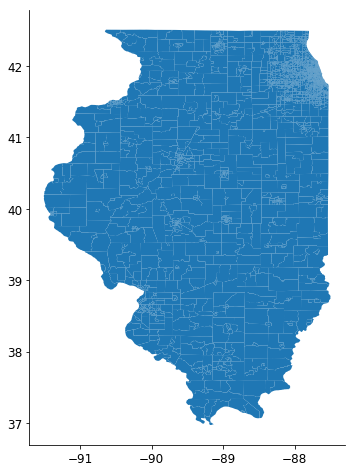

In [4]:
il_shp = gpd.read_file('gz_2010_17_140_00_500k.shp')
il_shp.plot(figsize=(8, 8))

You'll notice that Illinois looks a little distorted. That's because we need to assign to it a different [CRS (Coordinate Reference System)](https://en.wikipedia.org/wiki/Spatial_reference_system). Once we've assigned it an appropriate CRS, it will not appear distorted.

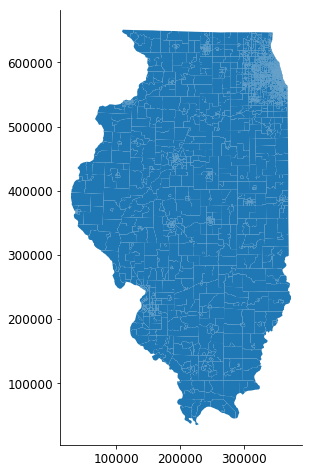

In [5]:
il_shp = il_shp.to_crs(epsg=3528)
il_shp.plot(figsize=(8,8))

In addition to being able to plot the shapefile data, it is also representable in table form as shown below.

In [6]:
il_shp.head()

,GEO_ID,STATE,COUNTY,TRACT,NAME,LSAD,CENSUSAREA,geometry
0,1400000US17031440300,17,031,440300,4403,Tract,0.499,"POLYGON ((359779.9978654641 563694.9002127325,..."
1,1400000US17031440600,17,031,440600,4406,Tract,0.259,"POLYGON ((359797.3104456991 563086.2470920575,..."
2,1400000US17031440700,17,031,440700,4407,Tract,0.126,"POLYGON ((360201.1277513976 563098.1839096176,..."
3,1400000US17031460200,17,031,460200,4602,Tract,0.232,"POLYGON ((364927.5359409263 564034.7571055747,..."
4,1400000US17031460600,17,031,460600,4606,Tract,0.101,"POLYGON ((364641.5013051527 563219.0938686698,..."


In order to get the subset of tracts for Cook County, we'll need to filter the dataset for the rows where **COUNTY** is **031**.

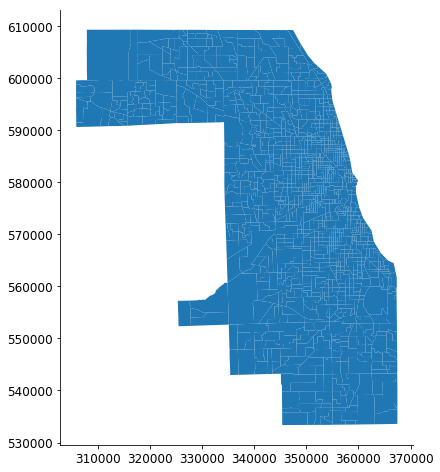

In [7]:
cook_county_tracts = il_shp[il_shp['COUNTY'] == '031']
cook_county_tracts.plot(figsize = (8,8))

Finally, we can export the resulting filtered data to a `.geojson` file.

In [64]:
cook_county_tracts.to_file('./cook_county_tract_level.geojson', driver='GeoJSON')

/Users/jsaxon/anaconda/envs/py-geo/lib/python3.6/site-packages/geopandas/io/file.py:62: FionaDeprecationWarning: Use fiona.Env() instead.
  with fiona.drivers():


In [63]:
cook_county_tracts.set_geometry(cook_county_tracts.geometry.apply(lambda x : MultiPolygon([x]) if x.type == "Polygon" else x), inplace = True)